# Accuracy Comparison

In [1]:
%pylab inline
import pandas as pd
from OpticalRS import *
from sklearn.metrics import mean_squared_error
style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../data

/home/jkibele/Copy/JobStuff/PhD/iPythonNotebooks/DepthPaper/data


In [3]:
def mm2inch( mm ):
    if type(mm)==tuple:
        return tuple([m/25.4 for m in mm])
    else:
        return mm / 25.4

In [4]:
mm2inch(84)

3.3070866141732287

In [5]:
knndf = pd.read_pickle('KNNAccuracyDF.pkl')
lyzdf = pd.read_pickle('LyzengaAccuracyDF.pkl')

In [6]:
knndf.head()

,train_size,rand_state_0,rand_state_1,rand_state_2,rand_state_3,rand_state_4,rand_state_5,rand_state_6,rand_state_7,rand_state_8,rand_state_9
0,10.000000,3.180440,3.986271,4.038075,3.880430,4.189676,3.665754,3.729850,4.212915,3.386381,3.663035
1,21.707788,2.986429,3.672614,3.305606,3.026278,3.119262,3.590321,3.253487,3.391914,3.516780,3.101854
2,47.122807,2.842293,2.833481,2.980426,3.011659,2.950884,2.898510,3.022853,3.114499,2.971695,3.016916
3,102.293191,2.551844,2.668091,2.706387,2.712009,2.764613,2.699252,2.683939,2.611372,2.598113,2.614047
4,222.055892,2.360693,2.338444,2.355824,2.269657,2.434449,2.363350,2.401518,2.273475,2.432650,2.419675


## Training Point Limiting

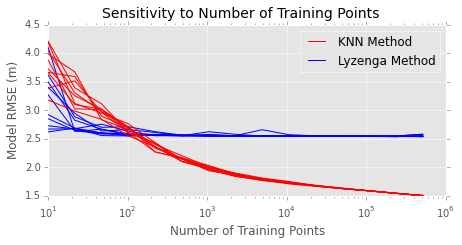

In [7]:
fig2,ax = subplots(1,1,figsize=mm2inch((181,78)))
for i,col in enumerate(knndf.columns[1:]):
    if i==0:
        ax.plot(knndf.train_size,knndf[col],c='r',label="KNN Method",zorder=10)
        ax.plot(lyzdf.train_size,lyzdf[col],c='b',label="Lyzenga Method",zorder=5)
    else:
        ax.plot(knndf.train_size,knndf[col],c='r',zorder=10)
        ax.plot(lyzdf.train_size,lyzdf[col],c='b',zorder=5)
ax.set_xscale('log')
ax.legend()
ax.set_xlabel("Number of Training Points")
ax.set_ylabel("Model RMSE (m)")
blah = fig2.suptitle("Sensitivity to Number of Training Points",fontsize=14)

In [8]:
fig2.savefig('../figures/NTrainPoints.png',dpi=300,bbox_inches='tight')

## Depth Limiting

In [9]:
knndldf = pd.read_pickle('KNNDepthLimitDF.pkl')
lyzdldf = pd.read_pickle('LyzengaDepthLimitDF.pkl')

In [10]:
knndldf.columns

Index([u'depth_lim', u'mean_error', u'rmse', u'standard_error'], dtype='object')

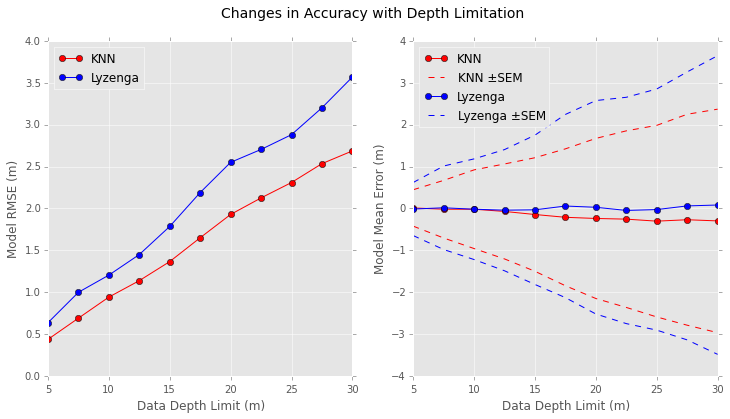

In [11]:
fig3,(ax1,ax2) = subplots(1,2,figsize=(12,6))
for i,df in enumerate([knndldf,lyzdldf]):
    if i==1:
        c='b'
        l='Lyzenga'
    else:
        c='r'
        l='KNN'
    ax1.plot(df.depth_lim,df.rmse,marker='o',c=c,label=l)
    em,es = df.mean_error, df.standard_error
    ax2.plot(df.depth_lim,em,marker='o',c=c,label=l)
    ax2.plot(df.depth_lim,em+es,linestyle='--',c=c,label=l+u" ±SEM")
    ax2.plot(df.depth_lim,em-es,linestyle='--',c=c)
ax2.set_xlabel("Data Depth Limit (m)")
ax2.set_ylabel("Model Mean Error (m)")
ax1.set_xlabel("Data Depth Limit (m)")
ax1.set_ylabel("Model RMSE (m)")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
blah = fig3.suptitle("Changes in Accuracy with Depth Limitation",fontsize=14)

In [12]:
fig3.savefig('../figures/DepthLimitation.png',dpi=300,bbox_inches='tight')

In [13]:
knndldf.mean_error.min(),lyzdldf.mean_error.max()

(-0.30468925833702087, 0.081013519357438835)

In [14]:
knndldf.mean_error

0     0.010858
1    -0.019056
2    -0.019465
3    -0.072763
4    -0.145981
5    -0.212605
6    -0.240488
7    -0.256539
8    -0.304689
9    -0.270813
10   -0.298899
Name: mean_error, dtype: float64

In [15]:
lyzdldf.rmse - knndldf.rmse

0     0.199194
1     0.309161
2     0.262603
3     0.311772
4     0.419965
5     0.540104
6     0.622552
7     0.579065
8     0.571757
9     0.667146
10    0.882617
Name: rmse, dtype: float64

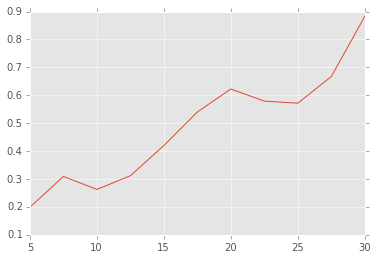

In [16]:
plot( knndldf.depth_lim, lyzdldf.rmse - knndldf.rmse )

## Spatial Distribution of Errors

In [17]:
knnpred = np.load('KNNPred.pkl')
knnprederr = np.load('KNNPredErr.pkl')
lyzpred = np.load('LyzDepthPred.pkl')
lyzprederr = np.load('LyzDepthPredErrs.pkl')
deprds = RasterDS('Leigh_Depth_atAcq_Resampled.tif')
darr = -1 * deprds.band_array.squeeze()
dlim = np.ma.masked_greater( darr, 20 )

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [19]:
depmin = 0
depmax = max( (lyzpred.max(),knnpred.max()) )
errmin = min( ( np.percentile(lyzprederr.compressed(),1), np.percentile(knnprederr.compressed(),1) ) )
errmax = max( ( np.percentile(lyzprederr.compressed(),99), np.percentile(knnprederr.compressed(),99) ) )

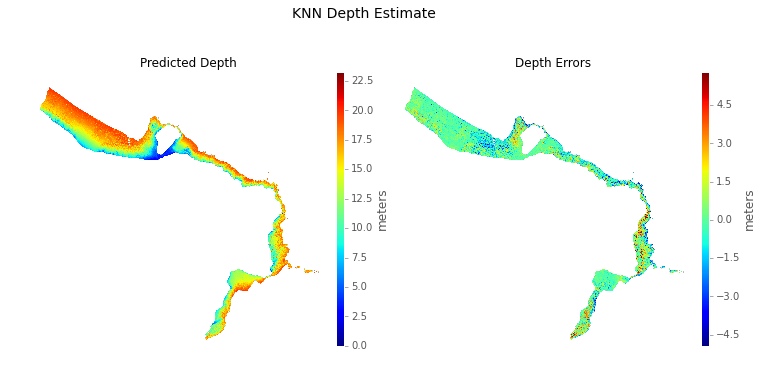

In [20]:
fig4, (ax1,ax2) = subplots(1,2,figsize=(12,6))
im1 = ax1.imshow( knnpred,vmin=depmin,vmax=depmax )
ax1.set_axis_off()
ax1.set_title('Predicted Depth',fontsize=12)
div1 = make_axes_locatable( ax1 )
cax1 = div1.append_axes('right',size='2.5%')
cbar1 = colorbar(im1,cax=cax1,label='meters')

im2 = ax2.imshow( knnprederr,vmin=errmin,vmax=errmax )
ax2.set_axis_off()
ax2.set_title('Depth Errors',fontsize=12)
div2 = make_axes_locatable( ax2 )
cax2 = div2.append_axes('right',size='2.5%')
cbar2 = colorbar(im2,cax=cax2,label='meters')

blah = fig4.suptitle('KNN Depth Estimate',fontsize=14)

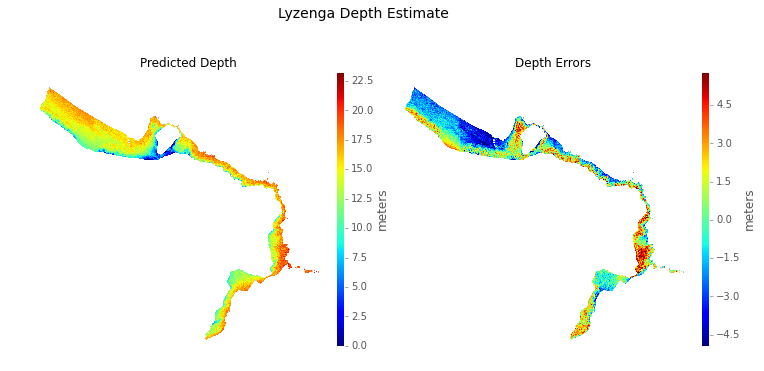

In [21]:
fig5, (ax1,ax2) = subplots(1,2,figsize=(12,6))
im1 = ax1.imshow( lyzpred,vmin=depmin,vmax=depmax )
ax1.set_axis_off()
ax1.set_title('Predicted Depth',fontsize=12)
div1 = make_axes_locatable( ax1 )
cax1 = div1.append_axes('right',size='2.5%')
cbar1 = colorbar(im1,cax=cax1,label='meters')

im2 = ax2.imshow( lyzprederr,vmin=errmin,vmax=errmax )
ax2.set_axis_off()
ax2.set_title('Depth Errors',fontsize=12)
div2 = make_axes_locatable( ax2 )
cax2 = div2.append_axes('right',size='2.5%')
cbar2 = colorbar(im2,cax=cax2,label='meters')

blah = fig5.suptitle('Lyzenga Depth Estimate',fontsize=14)

## A Better Way to Show the Same Thing

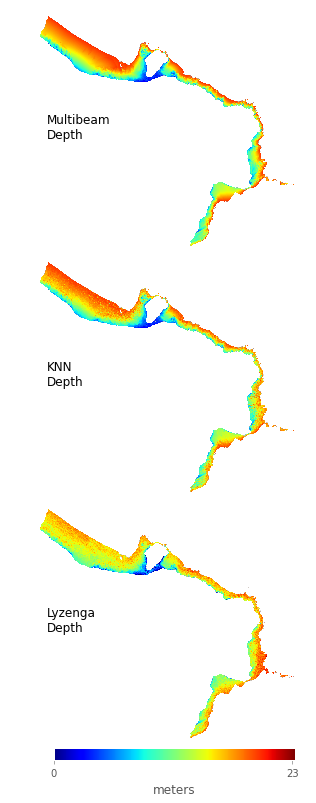

In [22]:
fig6_alt, axs = subplots(3,1,figsize=(4.5,11),sharex=True)
dlist = [dlim,knnpred,lyzpred]
axtits = ['Multibeam\nDepth','KNN\nDepth','Lyzenga\nDepth']
depthmax = max( [d.max() for d in dlist] )
for i,arr in enumerate(dlist):
    ax = axs[i]
    im = ax.imshow( arr, vmin=0, vmax=depthmax )
    ax.set_axis_off()
    ax.yaxis.set_ticks_position('none')
#     ax.set_ymargin(0)
#     ax.set_title(axtits[i],fontsize=12)
    ax.text(100,1500,axtits[i],fontsize=12)
    fig6_alt.tight_layout(h_pad=0.0)
# fig.suptitle('Measured and Predicted Depths',fontsize=14)
blah = fig6_alt.colorbar(im,ax=axs.ravel().tolist(),label='meters',\
                    orientation='horizontal',fraction=0.016,pad=0.01,\
                    ticks=[0.0,23.0])

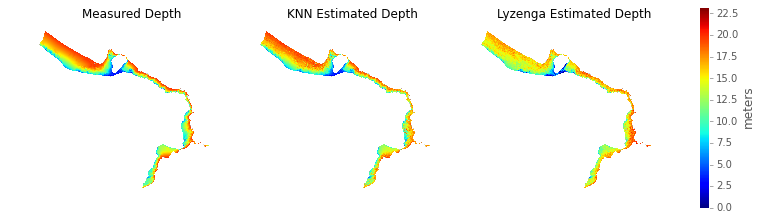

In [23]:
fig6, axs = subplots(1,3,figsize=(12,7))
dlist = [dlim,knnpred,lyzpred]
axtits = ['Measured Depth','KNN Estimated Depth','Lyzenga Estimated Depth']
depthmax = max( [d.max() for d in dlist] )
for i,arr in enumerate(dlist):
    ax = axs[i]
    im = ax.imshow( arr, vmin=0, vmax=depthmax )
    ax.set_axis_off()
    ax.set_title(axtits[i],fontsize=12)
# fig.suptitle('Measured and Predicted Depths',fontsize=14)
blah = fig6.colorbar(im,ax=axs.ravel().tolist(),label='meters',fraction=0.015)

In [24]:
fig6_alt.savefig('../figures/Predictions.png',dpi=300,bbox_inches='tight',pad_inches=0.0)

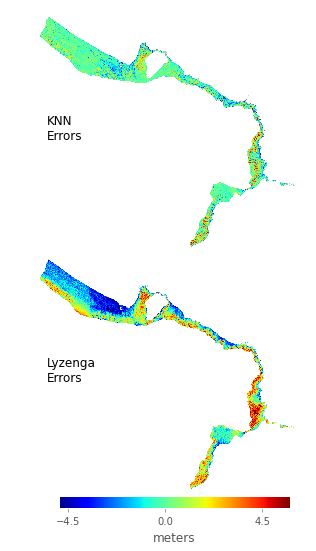

In [25]:
fig7, axs = subplots(2,1,figsize=(4.5,7.5),sharex=True )
dlist = [knnprederr,lyzprederr]
axtits = ['KNN\nErrors','Lyzenga\nErrors']
for i,arr in enumerate(dlist):
    ax = axs[i]
    im = ax.imshow( arr, vmin=min( [np.percentile(d.compressed(),1) for d in dlist] ), \
                           vmax=max( [np.percentile(d.compressed(),99) for d in dlist] ) )
    ax.set_axis_off()
    ax.text(100,1500,axtits[i],fontsize=12)
    fig7.tight_layout(h_pad=0.0)
# fig.suptitle('Measured and Predicted Depths',fontsize=14)
blah = fig7.colorbar(im,ax=axs.ravel().tolist(),label='meters',\
                    orientation='horizontal',fraction=0.023,pad=0.01,\
                    ticks=[-4.5,0,4.5])

In [26]:
fig7.savefig('../figures/PredictionErrors.png',dpi=300,bbox_inches='tight',pad_inches=0.0)

## HexBin Plots

In [27]:
lyzhex = pd.read_pickle('LyzPredVsMB.pkl')
knnhex = pd.read_pickle('KNN20mPredVsMB.pkl')

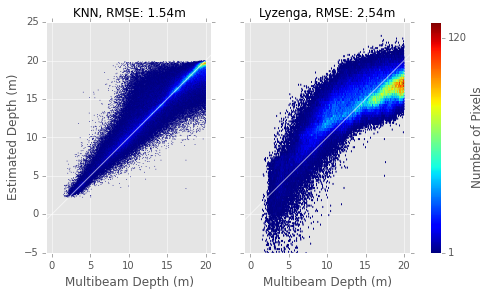

In [28]:
dfs = [knnhex,lyzhex]
axtits = ['KNN','Lyzenga']
fig8,axs = plt.subplots(1,2,figsize=mm2inch((181,105)),sharey=True)
for i,df in enumerate(dfs):
    ax = axs[i]
    mapa = ax.hexbin(df.mb_depth,df.prediction,mincnt=1,bins=None,gridsize=500,\
                     cmap=plt.cm.jet)#,vmin=0.3,vmax=2.0)
    if i==0:
        ax.set_ylabel('Estimated Depth (m)')
    ax.set_xlabel('Multibeam Depth (m)')
    rmse = np.sqrt( mean_squared_error( df.mb_depth, df.prediction ) )
#     n = x_train.shape[0]
    tit = ", RMSE: %.2fm" % (rmse)
    ax.set_title(axtits[i]+tit,fontsize=12)
    ax.set_aspect('equal')
    ax.axis([-5,25,-5,25])
    ax.plot([-5,25],[-5,25],c='white',alpha=0.6)
#     cb = plt.colorbar(mapa)
#     cb.set_label("Log10(N)")
blah = fig8.colorbar(mapa,ax=axs.ravel().tolist(),label='Number of Pixels',\
                     fraction=0.035,orientation='vertical',ticks=[1,120])
# blah = fig8.suptitle("Estimated vs. Multibeam Depth",fontsize=14,y=1.04,x=0.493)

In [29]:
fig8.savefig('../figures/PredVsMB.png',dpi=300,bbox_inches='tight')

In [30]:
mapim = plt.imread('../figures/JustMap.png')

In [31]:
deprds = RasterDS('Leigh_Depth_atAcq_Resampled.tif')
darr = -1 * deprds.band_array.squeeze()
darr = np.ma.masked_greater( darr, 20.0 )

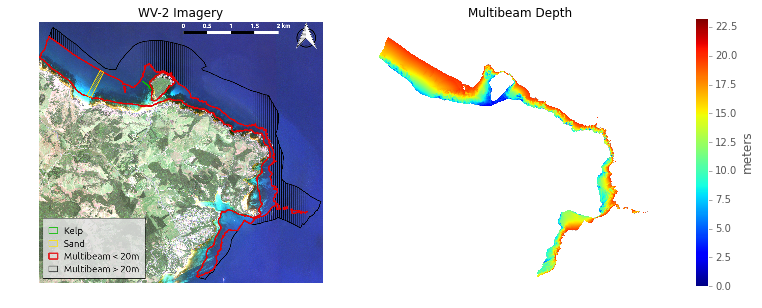

In [32]:
fig9, axs = subplots(1,2,figsize=(12,7))
dlist = [mapim,darr]
axtits = ['WV-2 Imagery','Multibeam Depth']
for i,arr in enumerate(dlist):
    ax = axs[i]
    im = ax.imshow( arr, vmin=0, vmax=depthmax )
    ax.set_axis_off()
    ax.set_title(axtits[i],fontsize=12)
# fig.suptitle('Measured and Predicted Depths',fontsize=14)
blah = fig9.colorbar(im,ax=axs.ravel().tolist(),label='meters',fraction=0.02)

In [33]:
fig9.savefig('../figures/MapAndDepth.png',dpi=300,bbox_inches='tight')

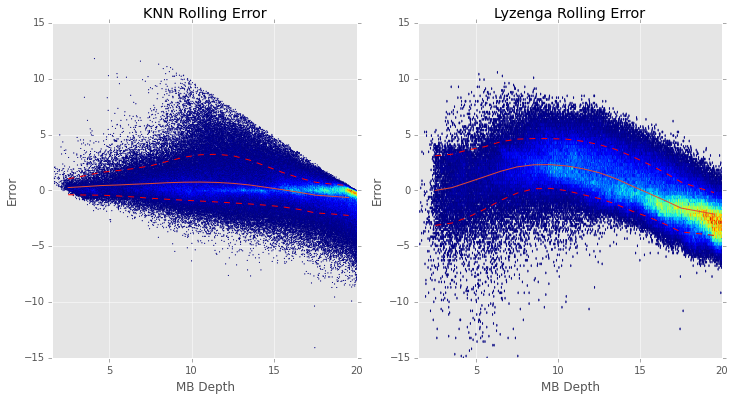

In [34]:
fig10, axs = subplots(1,2,figsize=(12,6))
plotlabels = ['KNN Rolling Error','Lyzenga Rolling Error']
for i,df in enumerate([knnhex,lyzhex]):
    ax = axs[i]
    resdf = df.sort_index(by='mb_depth')
    resdf.index = resdf.mb_depth
    resdf['error'] = resdf.prediction - resdf.mb_depth
    errlist,upp95,low95 = [],[],[]
    ds = arange(2.5,20,1)
    for d in ds:
        ld,hd = d-2.5, d+2.5
    #     print d, ld, hd, resdf.query('mb_depth > %i and mb_depth < %i' % (ld,hd)).count()
        errs = resdf.query('mb_depth > %i and mb_depth < %i' % (ld,hd)).error
        upp95.append( errs.quantile(0.90) )
        low95.append( errs.quantile(0.10) )
        errlist.append( errs.mean() )
    ax.plot(ds,errlist)
    ax.plot(ds,upp95,c='r',linestyle='--')
    ax.plot(ds,low95,c='r',linestyle='--')
#     ax.plot(resdf.mb_depth,np.convolve(resdf.error,np.ones(10000)/10000,'same'),\
#           alpha=1.0,linestyle='--',c='k')
#     pd.rolling_mean(resdf.error,10000,center=True).plot(ax=ax,c='k',linestyle='--')
#     ax.scatter(resdf.mb_depth,resdf.error,alpha=0.005)
    ax.hexbin(resdf.mb_depth,resdf.error,mincnt=1,bins=None,gridsize=500)
    ax.set_title(plotlabels[i])
    ax.set_xlabel("MB Depth")
    ax.set_ylabel("Error")
    ax.set_ylim(-15,15)
#     ax.set_xlim(0,20)

In [35]:
fig10.savefig('../figures/RollingErrors.png',dpi=300,bbox_inches='tight')